# Проект "Анализ оттока клиентов банка" 

**Описание проекта**

Банк «Метанпромбанк» в срочном порядке ищет аналитиков с уверенным владением «Python». Главной задачей станет анализ оттока клиентов. Анализ покажет, как клиенты пользуются услугами банка, а так же поможет составить портрет клиентов, которые склонны уходить из банка.

**Основная цель проекта**

Проанализировать информацию о клиентах банка и составить портрет клиентов, которые склонны к оттоку.

**Задачи проекта**

- Провести исследовательский анализ данных и выявить все значимые признаки отточности; 
- Выделить портреты клиентов и сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка; 
- Сформулировать и проверить статитические гипотезы; 
- Объединяя признаки отточности, сформировать сегменты и отобрать из них лучшие. Дать по ним рекомендации; 
- Подготовить презентацию по итогам исследования. 


## Общий вывод и рекомендации для отдела маркетинга 

Мы проанализировали клиентов регионального банка и выделили сегменты клиентов, которые склонны уходить из банка.

На этапе предобработки данных обнаружили: 
- около 23% пропусков в столбце 'balance', что может говорить о технической ошибке, так что стоит проверить способ сбора этой информации
- дубликаты в userid. Однако выяснилось, что дублирующиеся userid уникальны для каждого города. Вероятно раньше в Ярославле, Ростове и Рыбинске были свои базы данных, которые после объединили. Эту особенность стоит иметь в виду в будущем

Выяснили, что всего отток составил 18,2%

Выявили средний портрет отточных клиентов: 
- баллы кредитного скоринга находятся в диапазоне от 830 до 910 и от 930 до 940 баллов
- живут в Ярославле и Ростове
- мужчины
- возраст от 25 до 35 лет и от 50 до 60 лет
- имеют от 3 до 9 баллов собственности
- имеют на счёте более 1 млн
- имеют от 2 до 5 продуктов банка
- не имеют кредитную карту
- с доходом от 100 тысяч

Сформировали сегменты клиентов с наибольшей вероятностью оттока. Среди таковых наиболее значимыми оказались следующие сегменты: 
- клиенты с более, чем двумя продуктами - процент оттока: 39.49%
- клиенты c балансом более 1 млн - процент оттока: 38.49%
- клиенты без кредитной карты из Ярославля - процент оттока: 28.99%
- клиенты мужчины в возрасте от 25 до 35 лет - процент оттока: 25.51%
- клиенты без кредитной карты из Ростова - Процент оттока: 21.86%

**Рекомендации для отдела маркетинга**

- Следует выяснить почему уходят мужчины вообще и в частности в возрасте от 25 до 35 лет. Возможно, стоит предложить им повышенный кэшбек на определенные категории или кобрендинговые карты с автосалонами, заправками. 

- Возможно стоит рассмотреть вариант с предложением жителям Ярославля оформить кредитную карту, так как мы выяснили, что если у клиента она есть, то он с меньшей веротяностью уйдет из банка. 

- Клиенты с балансом от 1 млн тоже уходят, может быть их не устраивает ставка по вкладам или обслуживание. Возможно стоит подумать над индивидуальными предложениями по ставкам или страхованию вклада, а также предложить им расширенное клинтское обслуживание. Например выпуск серебрянных или золотых карт. 

- Самая проблемная группа это клиенты с более чем двумя продуктами банка. Стоит изучить вопрос с набором этих продуктов и процессом перехода с двух на три и более продуктов. Что это за продукты, действительно ли они нужны клиенту. Возможно проблема в клиентском сервисе - чем больше у клиента продуктов банка, тем чаще он с ним взаимодействует и что-то идет не так. 


## Загрузка библитек и данных

In [1]:
# Загрузка библиотек 

! pip install phik

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math
import warnings
warnings.filterwarnings('ignore')
import phik
from phik.report import plot_correlation_matrix
from phik import report

     |████████████████████████████████| 686 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 103.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [2]:
# Настраиваем отображение всех колонок и их ширину 

pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', 1000)

pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Загружаем данные 

try:
    df = pd.read_csv('/Users/kirillbakeev/Downloads/bank_scrooge.csv').copy()
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv').copy()
    
display(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0


Создадим функции для вывода общей информации о данных 

In [4]:
# Функция для поиска информации о пропусках 

def is_nan(df):
        for col in df.columns:
            data_missing = np.mean(df[col].isnull())
            print('{} - {}%'.format(col, round(data_missing*100)))

In [5]:
# Функция для вывода информации по датафрейму

def data_info(df):
    return display('10 случайных строк из данных', df.sample(10)), \
    display('Описание данных', df.describe(), 'Info'), \
    print(df.info()), \
    display('Размерность датафрейма', df.shape), \
    display('Количество дубликатов', df.duplicated().sum(), 'Пропуски в данных в %'), \
    display(is_nan(df))

### Информация о данных 

In [6]:
data_info(df)

'10 случайных строк из данных'

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
5664,213989,900.00,Рыбинск,М,34.00,5,542159.17,2,1,0,152649.68,0
8835,136628,925.00,Ярославль,М,40.00,0,NaN,1,0,1,259053.42,0
1215,226005,795.00,Ярославль,Ж,24.00,4,724805.75,2,0,1,225631.31,0
3578,218990,927.00,Рыбинск,М,36.00,0,NaN,2,0,1,239903.87,0
661,122604,817.00,Ростов,М,36.00,2,237951.32,3,1,0,203587.31,0
7319,179385,814.00,Ярославль,М,30.00,3,145695.95,2,1,1,196896.09,0
6815,224153,853.00,Ярославль,М,53.00,6,672118.41,3,0,0,83398.89,0
5486,119524,882.00,Ростов,М,27.00,3,573808.13,2,0,1,43644.45,1
6603,219667,886.00,Ярославль,Ж,72.00,3,273683.21,1,1,1,128067.75,0
4043,141291,870.00,Рыбинск,Ж,44.00,5,789790.13,1,1,0,220963.36,0


'Описание данных'

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


'Info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


'Размерность датафрейма'

(10000, 12)

'Количество дубликатов'

0

'Пропуски в данных в %'

USERID - 0%
score - 0%
city - 0%
gender - 0%
age - 0%
equity - 0%
balance - 23%
products - 0%
credit_card - 0%
last_activity - 0%
EST_SALARY - 0%
churn - 0%


None

(None, None, None, None, None, None)

**Промежуточный вывод**
В целом данные в порядке, но видно что есть большое число пропусков в столбце balance. 
Кроме того видно, что: 
- Столбцы нужно привести в единый вид
- Минимальное значение зарплаты 2546.30
- Возраст клиентов от 18 до 86 лет 


## Предобработка данных 

Приведем названия столбцов к нижнему регистру 

In [7]:
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


Посмотрим на пропуски в столбце balance 

In [8]:
df[df['balance'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,196820.07,0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,217469.48,0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.00,Ростов,М,38.00,0,NaN,1,0,0,171763.69,0
9984,125941,729.00,Ярославль,Ж,42.00,0,NaN,1,1,1,687538.70,0
9993,219924,884.00,Рыбинск,Ж,36.00,0,NaN,1,1,1,169844.88,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0


**Промежуточный вывод**

Из предыдущего шага мы выяснили, что пропусков в этом столбце 23%. Удаление такого большого объема данных может исказить результаты исследовательского анализа, как и заполнение средним или медианой. Оставим как есть. 

Посмотрим есть ли дубликаты среди пользователей

In [9]:
df['userid'].duplicated().sum()

73

Проверим есть ли пересечения дубликатов по городам и возрасту 

In [10]:
df[df.duplicated(['userid', 'city', 'age'])]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


**Промежуточный вывод** 

Дубликатов не оказалось, значит дубликаты userid в общей таблице уникальны для своих городов, поэтому ибавляться от них не стоит так как можем лишиться важных данных для дальнейшего анализа

## Исследовательский анализ данных

### Изучение интервалов значений характеристик, которые связаны с повышенным оттоком

Посмотрим на общий процент оттока клиентов 

,churn
churn,
0,8180
1,1820


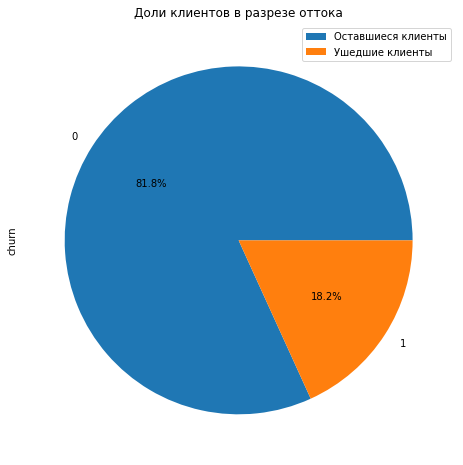

In [11]:
churn_perctage = df.groupby('churn').agg({'churn': 'count'})
display(churn_perctage)

churn_perctage.plot(kind='pie', y='churn', autopct='%1.1f%%', figsize=(8,8))
plt.title('Доли клиентов в разрезе оттока')
plt.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'])
plt.show()

Общий процент оттока клиентов составил 18.2%. 

Используем нормализованные гистограммы для исследования отточных клиентов по показателям.

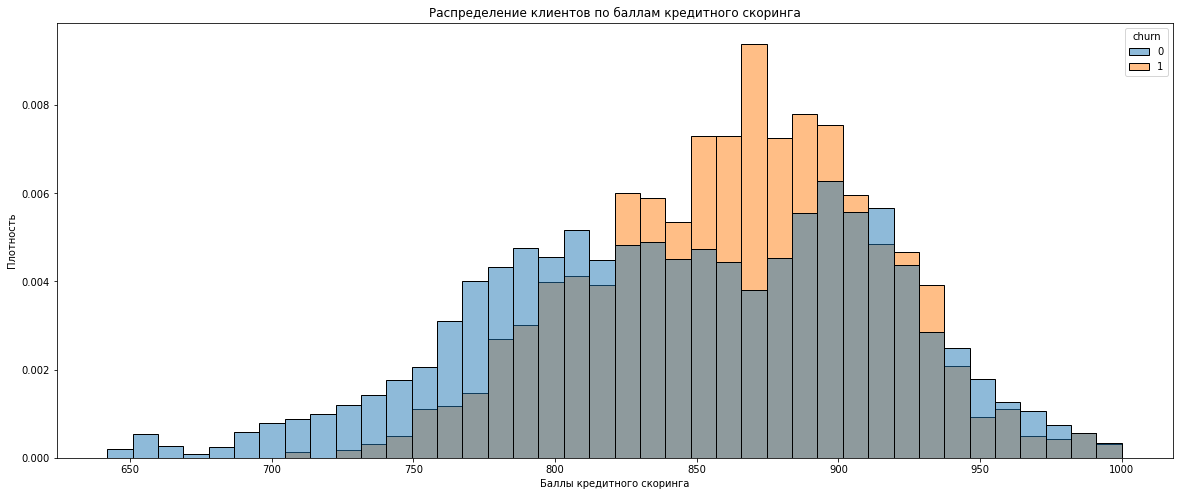

In [12]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='score', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов по баллам кредитного скоринга')
ax.set(xlabel='Баллы кредитного скоринга', ylabel='Плотность')
plt.show()

Видим, что можно выделить две группы отточности по показателю кредитного скоринга. Первая, самая крупная, начинается с 830 баллов до 910 баллов, вторая 930-940 баллов. 

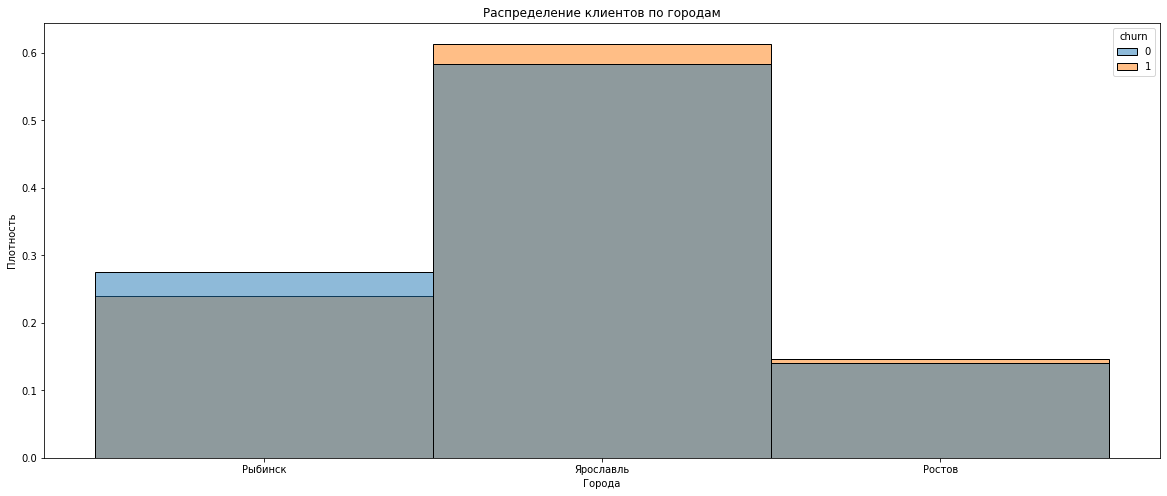

In [13]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='city', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов по городам')
ax.set(xlabel='Города', ylabel='Плотность')
plt.show()

Из трех городов по которым у нас есть данные клиенты ушли из Ярославля и Ростова. При этом в Рыбинске никаких проблем нет. 

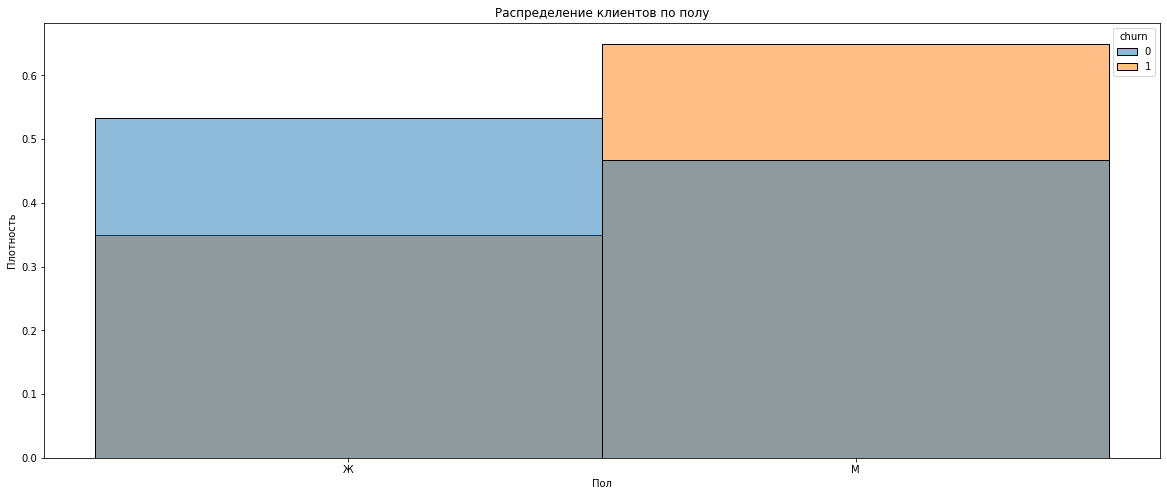

In [14]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='gender', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов по полу')
ax.set(xlabel='Пол', ylabel='Плотность')
plt.show()

Видим, что мужчины уходят чаще, чем женщины, но мужчин в датасете больше 

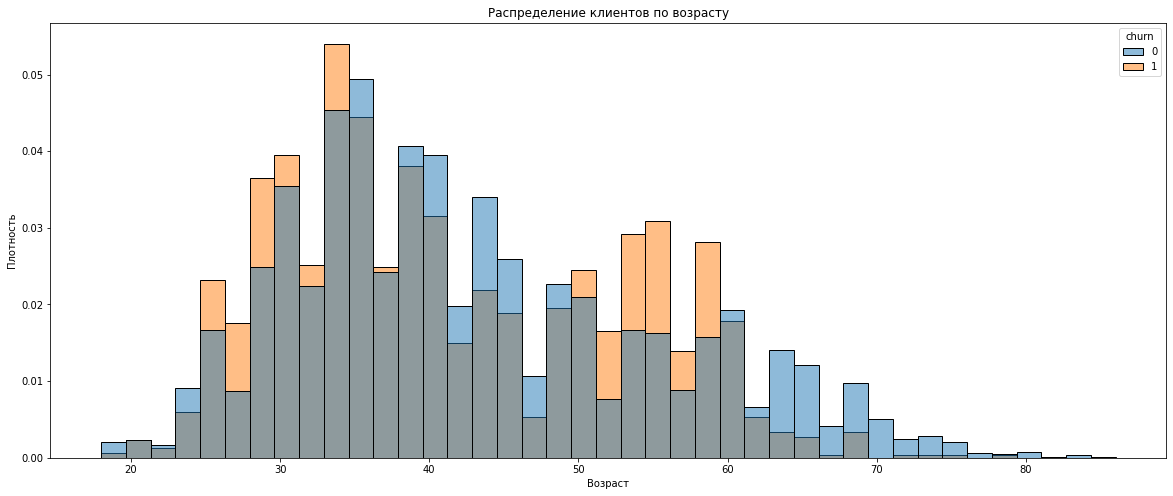

In [15]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='age', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов по возрасту')
ax.set(xlabel='Возраст', ylabel='Плотность')
plt.show()

График показывает две больше группы отточности, первая - клиенты в возрасте примерно от 25 до 35, и вторая - от 50 до 60 

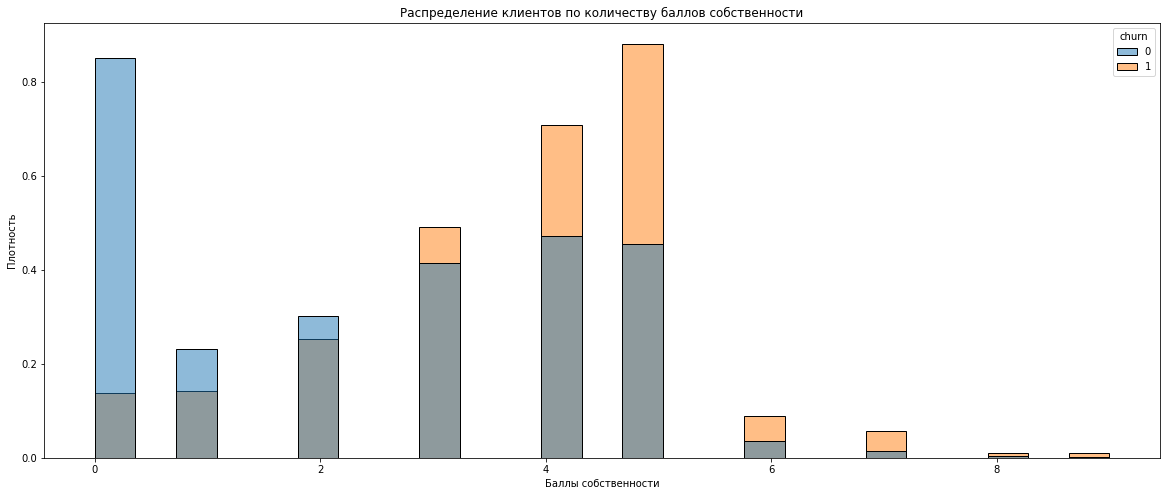

In [16]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='equity', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов по количеству баллов собственности')
ax.set(xlabel='Баллы собственности', ylabel='Плотность')
plt.show()

Чем больше у клиента баллов собственности, тем чаще они уходят. Саммый высокий отток среди тех, у кого от 3 до 9 баллов 

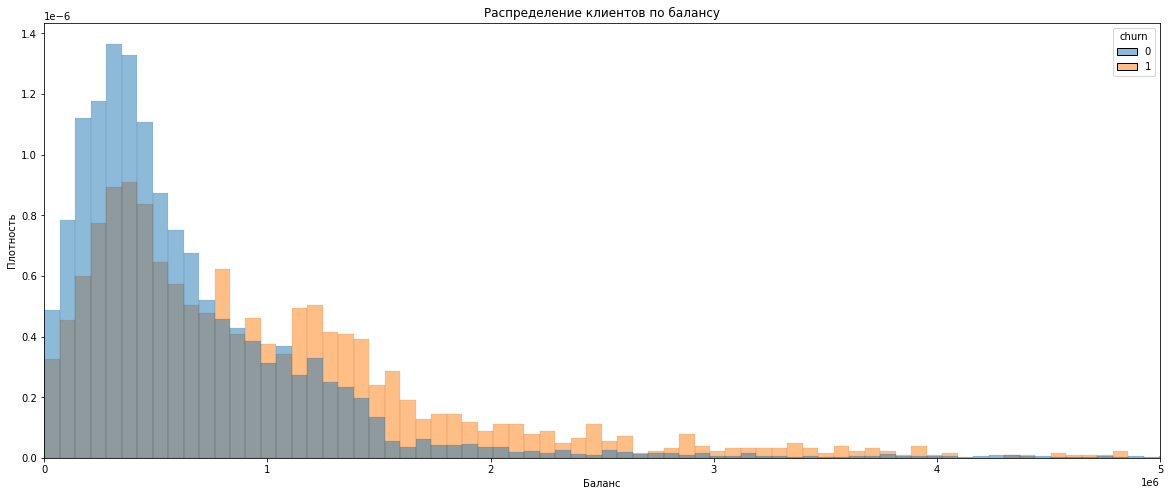

In [17]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='balance', hue='churn', stat="density", common_norm=False,);
plt.xlim(0, 5000000)
plt.title('Распределение клиентов по балансу')
ax.set(xlabel='Баланс', ylabel='Плотность')
plt.show()

График показывает, что отточность выше начиная с 1 млн на балансе 

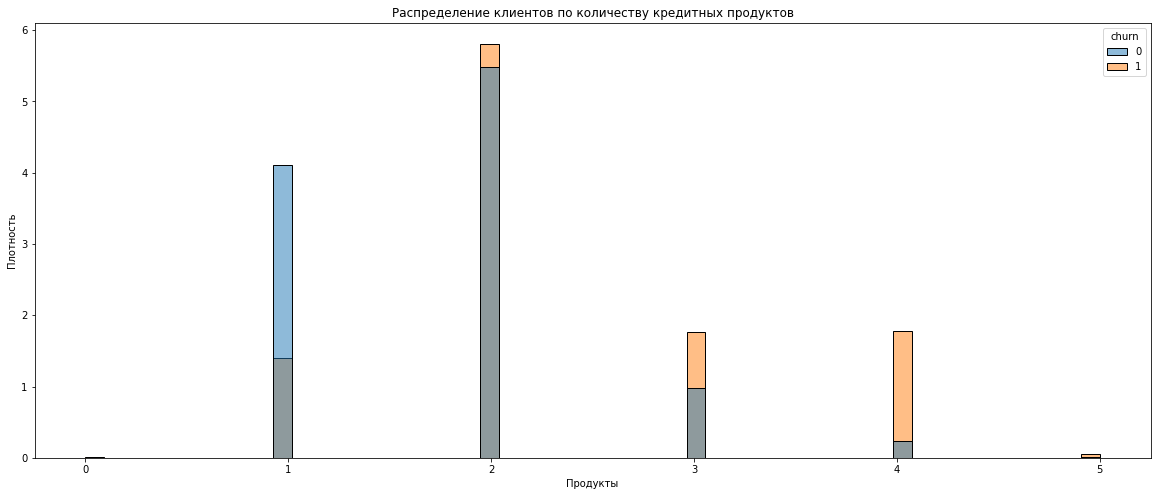

In [18]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='products', hue='churn', stat="density", common_norm=False,);
plt.title('Распределение клиентов по количеству кредитных продуктов')
ax.set(xlabel='Продукты', ylabel='Плотность')
plt.show()

Получается, чем больше у клиента продуктов, тем выше веротяность, что он уйдет. Клиенты начинают уходит имея больше одного продукта 

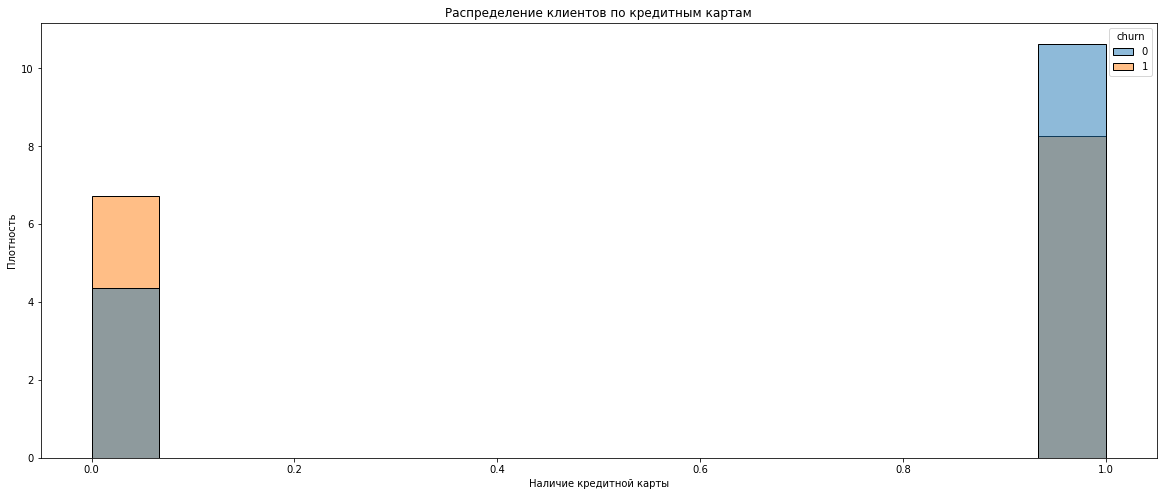

In [19]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='credit_card', hue='churn', stat="density", common_norm=False,);
plt.title('Распределение клиентов по кредитным картам')
ax.set(xlabel='Наличие кредитной карты', ylabel='Плотность')
plt.show()

Если у клиента есть кредитная карта, то вероятность, что он останется выше

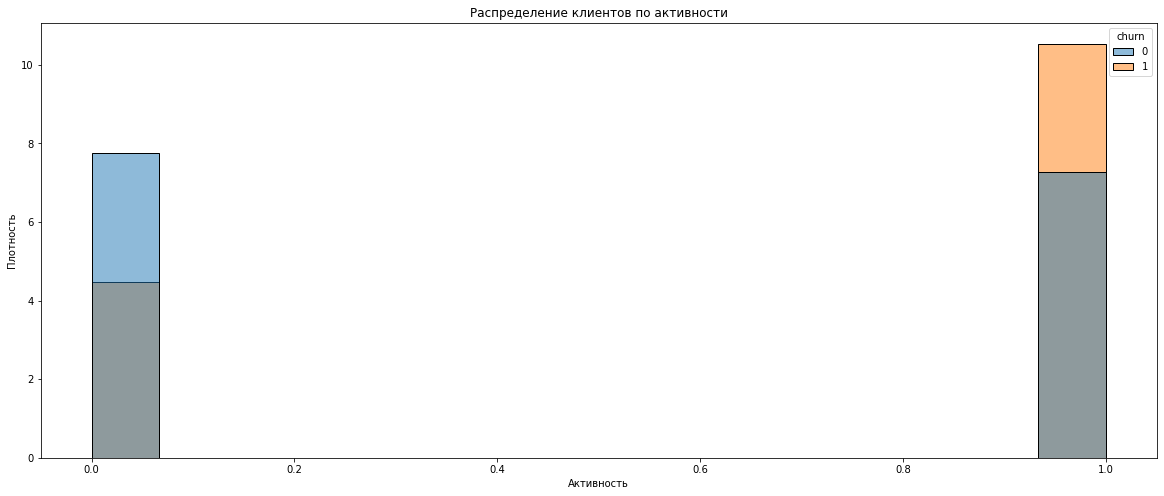

In [20]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='last_activity', hue='churn', stat="density", common_norm=False,);
plt.title('Распределение клиентов по активности')
ax.set(xlabel='Активность', ylabel='Плотность')
plt.show()

Видим, что уходят активные клиенты

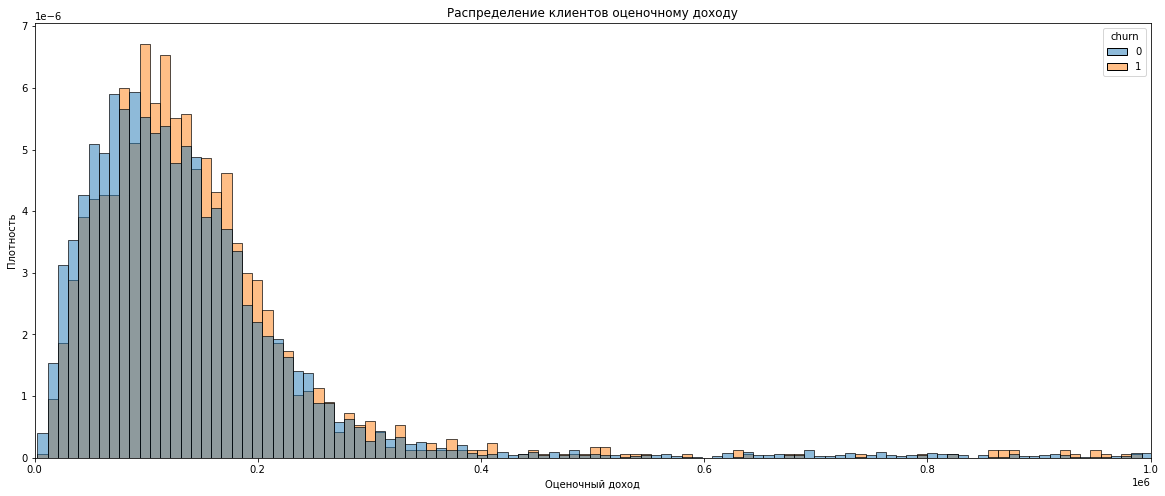

In [21]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=df, x='est_salary', hue='churn', stat="density", common_norm=False);
plt.title('Распределение клиентов оценочному доходу')
ax.set(xlabel='Оценочный доход', ylabel='Плотность')
plt.xlim(0, 1000000) # максимальный доход более 1300000 поэтому ограничим график 1000000 чтобы видеть более четкую картину 
plt.show()

График показывает, что п

**Промежуточный вывод**

Плотностные диаграммы повзолили выделить следующие интервалы значений характеристик, которые связаны с повышенным оттоком клиентов:

- клиенты, у которых баллы кредитного скоринга находятся в диапазоне 830 баллов до 910 баллов и 930-940 баллов
- отточные клиенты присутствуют в Ярославле и Ростове
- отточные клиенты чаще мужчины
- примерный возраст от 25 до 35 и - от 50 до 60
- отточные клиенты имеют от 3 до 9 баллов собственности
- на счёту у клиентов от 1 млн 
- отточные клиенты имеют от 2 до 5 продуктов банка
- чаще уходят клиенты без кредитной карты
- активные клиенты
- начиная где-то со 100 тысяч отток становится выше 

### Матрица корреляции и коэффициент корреляции Phik

Применим матрицу корреляции и коэффициент корреляции Phik для того, чтобы определить столбцы, которые связаны с повышенным оттоком. Для этого создадим копию датафрейма.

In [22]:
df_copy = df.copy()

Применим коэффициент корреляции Phik и вручную зададим нужные столбцы для анализа. 

In [23]:
interval_cols = ['score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn'] 
df_corr=df_copy[interval_cols]
phik_overview = df_corr.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,0.09,0.07,0.03,0.53,0.17,0.31,0.21,0.05,0.40,0.23
city,0.09,1.00,0.01,0.09,0.06,0.04,0.22,0.07,0.03,0.17,0.02
gender,0.07,0.01,1.00,0.29,0.06,0.05,0.12,0.20,0.01,0.14,0.22
age,0.03,0.09,0.29,1.00,0.05,0.02,0.13,0.16,0.09,0.36,0.19
equity,0.53,0.06,0.06,0.05,1.00,0.00,0.44,0.22,0.05,0.29,0.35
balance,0.17,0.04,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02
products,0.31,0.22,0.12,0.13,0.44,0.00,1.00,0.46,0.19,0.16,0.44
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.46,1.00,0.05,0.04,0.20
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.19,0.05,1.00,0.05,0.26
est_salary,0.40,0.17,0.14,0.36,0.29,0.37,0.16,0.04,0.05,1.00,0.05


Отдельно построим тепловую карту корреляций признаков непосредственно с оттоком

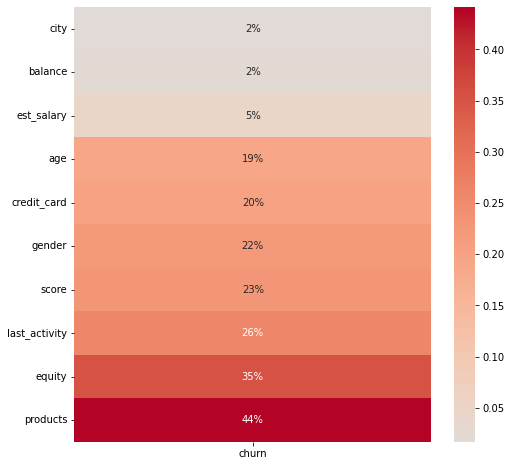

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(
    phik_overview.loc[:,['churn']].drop('churn').sort_values('churn'),
    annot=True, fmt=".0%", cmap="coolwarm", center=0);

**Промежуточный вывод**

Видим, что существует слабая взаимосвязь столбца 'churn' со столбцами 'products' и 'equity'. Еще меньше столбец 'churn' взаимосвязан со столбцами 'last_activity', 'score', 'gender', 'credit_card', 'age'.

### Сравнение портретов типичных клиентов, которые склонны и не склонны уходить из банка 

Портреты клиентов, которые склонны уходить из банка:

- баллы кредитного скоринга находятся в диапазоне от 830 до 910 и от 930 до 940 баллов
- живут в Ярославле и Ростове
- мужчины
- возраст от 25 до 35 лет и от 50 до 60 лет
- имеют от 3 до 9 баллов собственности
- имеют на счёте более 1 млн 
- имеют от 2 до 5 продуктов банка
- не имеют кредитную карту
- с доходом от 100 тысяч 


Портреты клиентов, которые не склонны уходить из банка:

- баллы кредитного скоринга находятся в диапазоне до 830 баллов и более 940 баллов
- живут в Рыбинске
- женщины
- возраст до 25 лет, от 35 до 50 лет и после 60 лет
- имеют 2 и меньше баллов собственности 
- на счёте у клиентов до 1 млн 
- имеют 1 продукт банка
- имеют кредитную карту
- имеют доход 100 тысяч и меньше

## Проверка статистических гипотез

### Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались

Сформулируем нулевую и альтернативную гипотезы так:
- Нулевая гипотеза (H0): статистически значимых различий в доходах клиентов, которые покинули банк и которые остались в банке, нет.
- Альтернативная гипотеза (H1): статистически значимые различия в доходах клиентов, которые покинули банк и которые остались в банке, есть.

Такие данные, как доход, не распределены нормально, поэтому для проверки гипотезы лучше использовать U-критерий Манна — Уитни. Зададим уровень стат. значимости в 5%. 

In [25]:
# разделим датасет на ушедших и оставшихся клиентов

df_churn_0 = df.query('churn == 0')
df_churn_1 = df.query('churn == 1')

In [26]:
alpha = 0.05 

results = st.mannwhitneyu(
    df_churn_0['est_salary'], 
    df_churn_1['est_salary'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.000243559272811695
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута. Значит принимаем альтернативную (Н1) - статистически значимые различия в доходах клиентов, которые покинули банк и которые остались в банке, есть.

### Проверка гипотезы о количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались

**Обоснование**

Коэффициент корреляции Phik и тепловая карта показали, что количество продуктов имеет наиболее значимую связь с оттоком по сравнению со всеми остальными параметрами. Так что стоит проверить статистические различия в этой гипотезе. 

Сформируем нулевую и альтернативную гипотезы так: 
- Нулевая гипотеза (H0): Статистически значимой разницы в количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались, нет 
- Альтернативная гипотеза (H1): Статистически значимая разница в количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались, есть 

Посчитаем p-value, при помощи t-критери Стьюдента используя st.ttest_ind из библиотеки scipy для сравнения средних двух выборок. Параметр equal_var установим на False, поскольку мы не уверены в распределении дисперсий.

Уровень стат. значимости зададим в 5%

In [27]:
alpha = 0.05
results = st.ttest_ind(
    df_churn_0['products'], 
    df_churn_1['products'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 1.9356112628058777e-138
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит принимаем альтернативную (H1) - статистически значимая разница в количестве используемых продуктов между теми клиентами, которые ушли и теми, которые остались, есть


## Сегментация клиентов

Сформируем сегменты клиентов с наибольшей вероятностью оттока

In [28]:
print('Сегмент клиентов мужчин в возрасте от 25 до 35 лет')
print('Процент оттока: {:.2%}'.format(df.query('gender == "М" and age >= 25 and age <= 35')['churn'].mean()))
print('Размер группы:', df.query('gender == "М" and age >= 25 and age <= 35')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов без кредитной карты из Ярославля')
print('Процент оттока: {:.2%}'.format(df.query('credit_card == 0 and city == "Ярославль"')['churn'].mean()))
print('Размер группы:', df.query('credit_card == 0 and city == "Ярославль"')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов без кредитной карты из Ростова')
print('Процент оттока: {:.2%}'.format(df.query('credit_card == 0 and city == "Ростов"')['churn'].mean()))
print('Размер группы:', df.query('credit_card == 0 and city == "Ростов"')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов c балансом более 1 млн')
print('Процент оттока: {:.2%}'.format(df.query('balance >= 1000000')['churn'].mean()))
print('Размер группы:', df.query('balance >= 1000000')['churn'].count())
print('---------------------------------------')

print('Сегмент клиентов с более, чем двумя продуктами')
print('Процент оттока: {:.2%}'.format(df.query('products > 2')['churn'].mean()))
print('Размер группы:', df.query('products > 2')['churn'].count())

Сегмент клиентов мужчин в возрасте от 25 до 35 лет
Процент оттока: 25.51%
Размер группы: 1780
---------------------------------------
Сегмент клиентов без кредитной карты из Ярославля
Процент оттока: 28.99%
Размер группы: 1618
---------------------------------------
Сегмент клиентов без кредитной карты из Ростова
Процент оттока: 21.86%
Размер группы: 613
---------------------------------------
Сегмент клиентов c балансом более 1 млн
Процент оттока: 38.49%
Размер группы: 1876
---------------------------------------
Сегмент клиентов с более, чем двумя продуктами
Процент оттока: 39.49%
Размер группы: 1532


Самые проблемный сегмент - клиенты с более чем 2 продуктами банка. Есть проблемы и с сегментом клиентов с балансом более 1 млн и с сегментом без кредитной карты в Ярославле и Ростове.
